<a href="https://colab.research.google.com/github/Divyanshu-ISM/Machine-Learning-Deep-Learning/blob/main/100ML_Day5_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 100 ML Days : Day 5 : K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
len(df)

400

In [6]:
df['Male'] = pd.get_dummies(df['Gender'],drop_first=True)

df = df.drop('Gender',axis=1)

df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [7]:
df = df.drop('User ID',axis=1)

In [8]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [9]:
X = df[['Age','EstimatedSalary','Male']].values
y = df['Purchased'].values

##Train Test split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature Scaling
> Since KNN is a Distance based Algorithm

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fitting the KNN model.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
yp = knn.predict(X_test_scaled)

## Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
accuracy_score(y_test,yp)

0.92

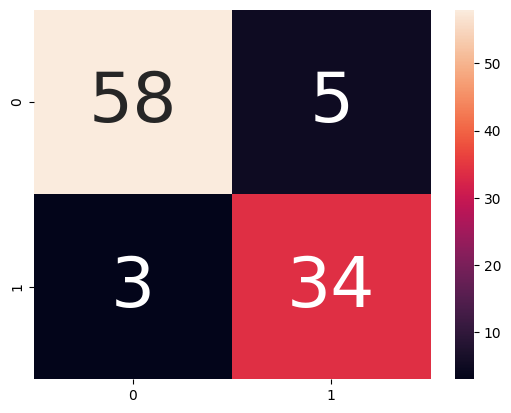

In [43]:
sns.heatmap(confusion_matrix(y_test,yp),annot=True,annot_kws={'size':50});

## This model makes 8 incorrect classifications.

## Finding the best K value based on Accuracy score

In [31]:
ks = np.linspace(1,50,dtype='int64')

In [32]:
acc = []

for k in ks:
  kn = KNeighborsClassifier(n_neighbors=k)
  kn.fit(X_train_scaled,y_train)
  yp = kn.predict(X_test_scaled)
  a = accuracy_score(y_test,yp)
  acc.append(a)


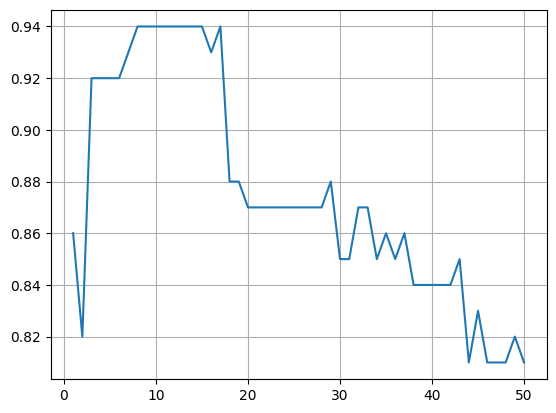

In [33]:
plt.style.use('default')
plt.plot(ks,acc)
plt.grid()

## So it is clear that MAX accuracy possible is 94% with k = 10

In [38]:
bestk = KNeighborsClassifier(n_neighbors=10)
bestk.fit(X_train_scaled,y_train)
yp_best = bestk.predict(X_test_scaled)
aca_best = accuracy_score(y_test,yp_best)

In [39]:
aca_best

0.94

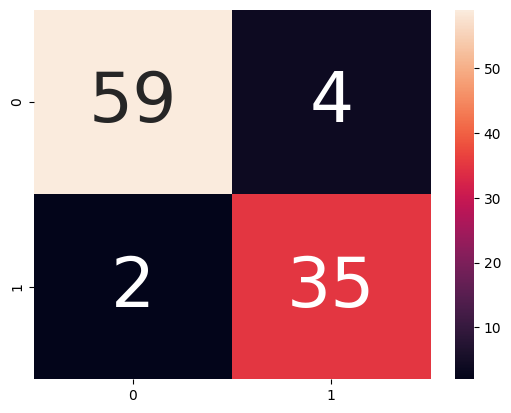

In [40]:
sns.heatmap(confusion_matrix(y_test,yp_best),annot=True,annot_kws={'size':50});

## This model  makes 6 incorrect classifications. 2 less than the previous model.